<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd # импорт библиотеки pandas 
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
plt.style.use('seaborn-pastel')
import seaborn as sns # импорт библиотеки seaborn
import numpy as np # импорт библиотеки numpy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import time
from tqdm import tqdm # импорт библиотеки tqdm для просмотра прогресса обучения модели

Откроем файл и изучим данные:

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

df_list = [df_full, df_train, df_test]

pd.options.display.max_columns = None # полностью отображаем столбцы

In [3]:
for df in df_list:
    display(df.head())
    df.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

**Описание данных**
**Технологический процесс**

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
 - Xanthate **— ксантогенат (промотер, или активатор флотации);
 - Sulphate — сульфат (на данном производстве сульфид натрия);
 - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:

`[этап].[тип_параметра].[название_параметра]`

Пример: *rougher.input.feed_ag*

**Возможные значения для блока** `[этап]`:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Возможные значения для блока** `[тип_параметра]`:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

**Расчет эффективности**

Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [4]:
# создадим функцию
def output_recovery(C, F, T):
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

где:

- T — доля золота в отвальных хвостах после флотации/очистки;
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки.

In [5]:
# выводим расчеты в отдельный датафрейм
df_test_recovery = df_train[['rougher.output.concentrate_au', 
                            'rougher.input.feed_au', 
                            'rougher.output.tail_au', 
                            'rougher.output.recovery']]

# рассчитываем значение
df_test_recovery['check_recovery'] = df_test_recovery.apply(
    lambda row: output_recovery(row['rougher.output.concentrate_au'], 
                                row['rougher.input.feed_au'], 
                                row['rougher.output.tail_au']), 
    axis=1)

# отображаем таблицу
df_test_recovery.head()

/tmp/ipykernel_145/2315603685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_recovery['check_recovery'] = df_test_recovery.apply(


,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,check_recovery
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


In [6]:
# разделим на предсказания и целевой результат
df_test_recovery_target = df_test_recovery['rougher.output.recovery']
df_test_recovery_predictions = df_test_recovery['check_recovery']

# рассчитаем MAE
round(mean_absolute_error(
    df_test_recovery_target, 
    df_test_recovery_predictions
), 2)

0.0

Среднее абсолютное отклонение показывает нам то, что исходный продукт может отличаться от фактического выведенного продукта.

Средний MAE вышел 0.0. Значит все рассчитано абсолютно правильно.

Рассмотрим далее признаки обогащения полезного ископаемого (далее - ПИ)

**Анализ признаков тестовой выборки**

Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

Эти столбцы необходимо будет убрать на обучающей выборке, поэтому их следует сохранить:

In [7]:
# создаём столбец и включаем в него столбец date
columns_not_needed = ['date']

# смотрим столбцы
for col1 in df_full.columns:
    if col1 not in df_test.columns:
        columns_not_needed.append(col1)
        
columns_not_needed

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.

Рассмотрим недоступные строки:

- `final.output.concentrate`, `final.output.recovery`, `final.output.tail` - финальные характеристики ПИ, и эффективность полного цикла обогащения
- `primary_cleaner.output.concentrate`, `primary_cleaner.output.tail` - результаты первичной очистки
- `rougher.calculation`, `rougher.output.concentrat`, `rougher.output.tail`, `rougher.output.recovery` - расчетные характеристики флотационных установок, концентрат и хвост от флотации, эффективность
- `secondary_cleaner.output` - результаты вторичной очистки (количество продукта)

То, что объединяет эти столбцы - это результаты обогащения ПИ. Тестовая выборка содержит в себе столбцы, которые являются исходными - т.е. до начала обогащения. С помощью этих данных мы должны создать модель, которая будет предсказывать эффективность будущей флотации.

**Предобработка данных**

Проведем предобработку данных:

In [8]:
for df in df_list:
    display(df.duplicated().sum())

0

0

0

Дубликатов в столбцах нет.

Проверим пропуски:

In [9]:
for df in df_list:
    display(df.isna().sum()[df.isna().sum() > 0])

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_ag                            1
final.output.tail_pb                          101
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 63, dtype: int64

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_pb                          100
final.output.tail_sol                           5
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 62, dtype: int64

primary_cleaner.input.sulfate                4
primary_cleaner.input.depressant             5
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
rougher.input.feed_size                      1
rougher.input.feed_sol                      21
rougher.input.floatbank10_sulfate            5
rougher.input.floatbank11_sulfate            8
rougher.input.floatbank11_xanthate          25
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64

Есть несколько способов заполнить пропуски в данных:

- удалить строки с пропусками;
- заполнить пропуски рандомным значением по нормальному распределению в столбце или средним значением; 
- как сказано в условии задачи - данные распределены по времени, значит их можно заполнить прошлым или будущим значением столбца.

Нужно заполнить пропуски значением в прошлой или следующей строке, т.к. данные распределены по времени, то при удалении строк - нить обогащения потеряется. Так же потеряется при заполнении их медианным или средним значением.

Заполним пропуски предыдущим значением, так как, возможно, этот параметр остался с предыдущего.

Так как полный датасет содержит в себе остальные данные - заполним пропуски там и дополним датасеты:

In [10]:
# проверим, как выглядит пропущенная строка и примем решение
display(
    df_full.loc[df_full[df_full['secondary_cleaner.state.floatbank5_a_level'].isna()].index - 1], 
    df_full.loc[df_full[df_full['secondary_cleaner.state.floatbank5_a_level'].isna()].index],
    df_full.loc[df_full[df_full['secondary_cleaner.state.floatbank5_a_level'].isna()].index + 1]
)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
113,2016-01-21 09:00:00,5.518476,10.996012,9.156174,43.715161,70.768558,11.668317,2.158998,17.314961,3.154588,182.179285,14.984341,7.25,1.199236,10.968054,9.765347,20.195485,31.894047,17.499777,3.994096,8.06215,3.232599,1545.484903,-499.395904,1545.32695,-499.602128,1551.116769,-500.056331,1547.658107,-499.956738,39994.394226,3210.019323,3148.8507,2.354674,10.681307,3.901517,616.370312,65.949832,41.562786,9.1868,18.152634,7.800337,18.120019,7.792649,12.987662,7.942706,28.431386,19.585482,84.83106,5.526595,0.891034,18.961437,2.314505,1000.771121,-499.00561,1599.803057,-500.740363,1599.383672,-500.010667,1401.533662,-500.539394,1200.064892,-500.157329,1099.516965,-500.102858,16.361991,5.66595,12.161492,3.346496,25.013028,-499.510633,23.005987,-498.694189,24.071142,-498.889518,22.973289,-499.782048,13.954643,-564.670807,11.908144,-570.810245,10.004194,-509.665317,8.056656,-500.404815,11.964116,-599.140277


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,5.782224,10.969985,9.30126,43.181003,74.257359,11.95976,2.064173,15.139256,3.091437,NaN,NaN,7.25,NaN,11.345656,9.424562,20.275368,31.333106,17.514891,3.971093,7.845526,3.162975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.367651,12.028591,4.203939,NaN,NaN,41.78257,9.953462,NaN,NaN,NaN,NaN,13.678706,7.790201,28.779023,19.650397,86.217222,6.055658,0.862177,19.770304,2.435464,NaN,NaN,NaN,NaN,NaN,NaN,1393.735867,-501.357678,1196.516363,-505.322143,1097.010735,-499.416892,16.134409,5.427901,12.116604,3.259027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
115,2016-01-21 11:00:00,6.289592,10.800593,9.86864,42.867375,72.591034,11.979427,1.99416,15.428955,3.306867,226.482598,15.988715,7.25,1.177436,11.823693,9.104889,20.79622,30.591992,17.790026,4.045769,8.07192,3.168791,1551.478928,-500.297355,1552.263619,-500.38531,1551.033618,-501.084621,1548.019363,-498.248448,41926.430282,3214.010084,3203.598599,2.392638,12.157881,4.187072,629.869575,64.640971,42.297118,10.018148,21.212174,7.815061,21.202685,7.783254,13.874464,7.780895,29.02042,19.846317,84.773069,6.55585,0.904985,20.229227,2.666522,1001.881444,-499.979072,1601.857535,-498.607855,1600.150978,-497.100764,1404.006789,-499.828588,1202.257112,-498.304955,1102.077526,-499.363824,16.743933,5.303097,12.320883,3.366731,25.043738,-500.52718,22.9673,-499.16486,24.016298,-496.333432,22.972694,-500.758058,14.080498,-548.457442,11.982429,-549.290032,10.122944,-488.774842,7.968697,-500.079061,12.042943,-598.392513


Так как значения, обычно, указывают на то, что осталось при обогащении - стоит заполнить пропущенные значения значением из предыдущей строки:

In [11]:
for df in df_list:
    df.fillna(method='ffill', inplace=True)

**Вывод**

Данные изучены, выполнена предобработка данных, можно приступить к следующим этапам.

## Анализ данных

**Концентрация металлов**

1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

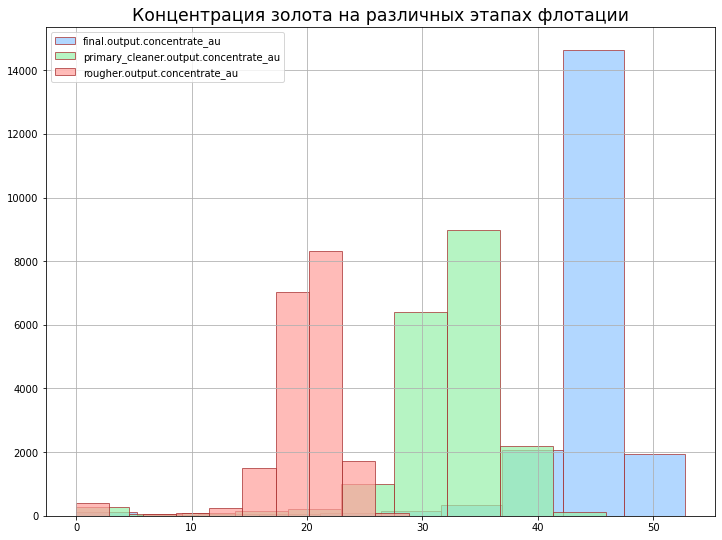

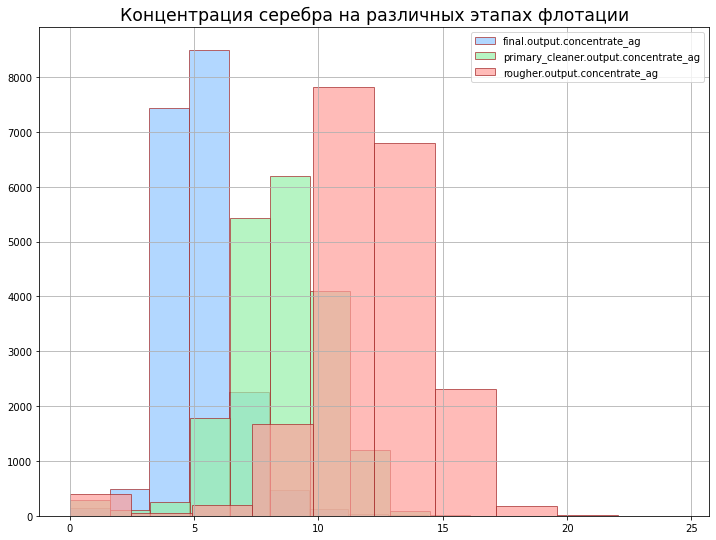

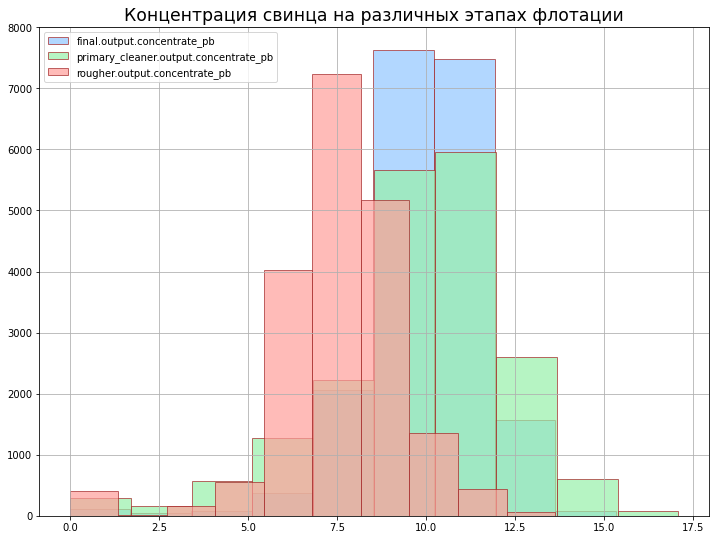

In [12]:
# список для цикла
sub_list = {'au':'золота', 
            'ag':'серебра', 
            'pb':'свинца'}

# создаём цикл для вывода необходимых графиков
for sub in sub_list:
    plt.figure(figsize=(12,9))
    
    for col in df_full.columns:
        if ('concentrate_'+sub) in col:
            df_full[col].hist(alpha=0.7, edgecolor='brown')

    plt.legend(list(filter(lambda col: ('concentrate_'+sub) in col, df_full.columns)))
    plt.title(f'Концентрация {sub_list[sub]} на различных этапах флотации', fontsize='xx-large')
    plt.show()

Из полученных графиков можно сделать вывод:

- Концентрация золота постепенно увеличивается с каждой очисткой
- Концентрация серебра уменьшается
- Концентрация свинца сначала увеличивается, но потом остается на одинаковом уровне.

**Распределение гранул сырья**

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Построим гистограммы значений:

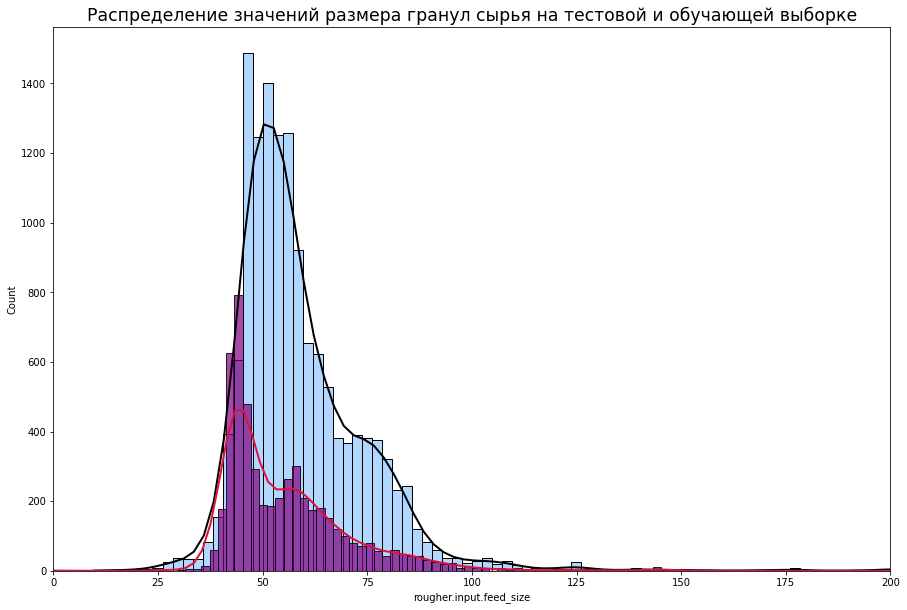

In [13]:
# рассмотрим оба графика на одном

plt.figure(figsize = (15,10))
plt.xlim(0, 200)
ax = sns.histplot(df_train['rougher.input.feed_size'], 
                  bins=200, 
                  kde=True, 
                  alpha=0.7,
                  line_kws = {'color': 'red', "lw":2})
ax.lines[0].set_color('black')
ax = sns.histplot(df_test['rougher.input.feed_size'], 
                  bins=200, 
                  kde=True, 
                  color='purple',
                  alpha=0.7,
                  line_kws = {'color': 'red', "lw":2})
ax.lines[1].set_color('crimson')
plt.title('Распределение значений размера гранул сырья на тестовой и обучающей выборке', fontsize='xx-large')
plt.show()

Видно, что значения разнятся, попробуем построить график оценки плотности распределения:

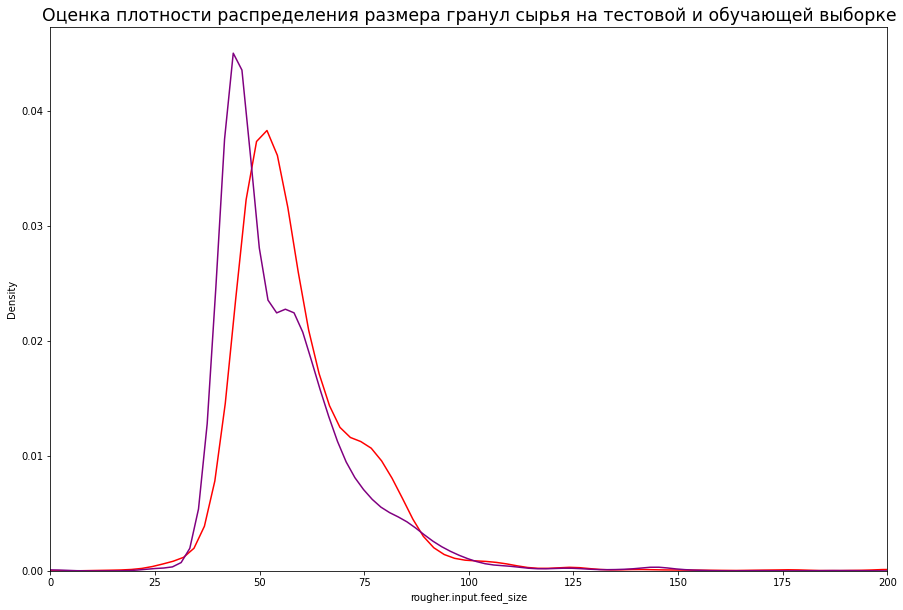

In [14]:
plt.figure(figsize = (15,10))
plt.xlim(0, 200)
ax = sns.kdeplot(df_train['rougher.input.feed_size'], color='red')
ax = sns.kdeplot(df_test['rougher.input.feed_size'], color='purple')
plt.title('Оценка плотности распределения размера гранул сырья на тестовой и обучающей выборке', fontsize='xx-large')
plt.show()

Распределения не пересекаются, средние немного смещены.

Такое распределение не повлияет негативно для моделей машинного обучения, можно оставить значения без изменений.

**Суммарная концентрация**

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Нам нужно рассмотреть суммарную концентрацию всех веществ на столбцах (стадиях):

- `rougher.input.feed_` - черновой концентрат до флотации в сырье
- `rougher.output.concentrate_` - черновой концентрат после флотации
- `final.output.concentrate_` - финальный концентрат после всех этапов

In [15]:
# создаём списки для заполнения таблицы
col_list = ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']
sub_list = ['au', 'ag', 'pb', 'sol']

# новая таблица для заполнения и наглядности
df_con = pd.DataFrame()
df_con['date'] = df_full['date']

# выбираем нужные столбцы
for col1 in col_list:
    for sub in sub_list:
        for col2 in df_full.columns:
            if (col1+sub) in col2:
                df_con[col2] = df_full[col2]
            
# посчитаем общую концентрацию по всем веществам
df_con['rougher.input.feed'] = (
    df_con['rougher.input.feed_au'] +
    df_con['rougher.input.feed_ag'] +
    df_con['rougher.input.feed_pb'] +
    df_con['rougher.input.feed_sol']
)

df_con['rougher.output.concentrate'] = (
    df_con['rougher.output.concentrate_au'] +
    df_con['rougher.output.concentrate_ag'] +
    df_con['rougher.output.concentrate_pb'] +
    df_con['rougher.output.concentrate_sol']
)

df_con['final.output.concentrate'] = (
    df_con['final.output.concentrate_au'] +
    df_con['final.output.concentrate_ag'] +
    df_con['final.output.concentrate_pb'] +
    df_con['final.output.concentrate_sol']
)

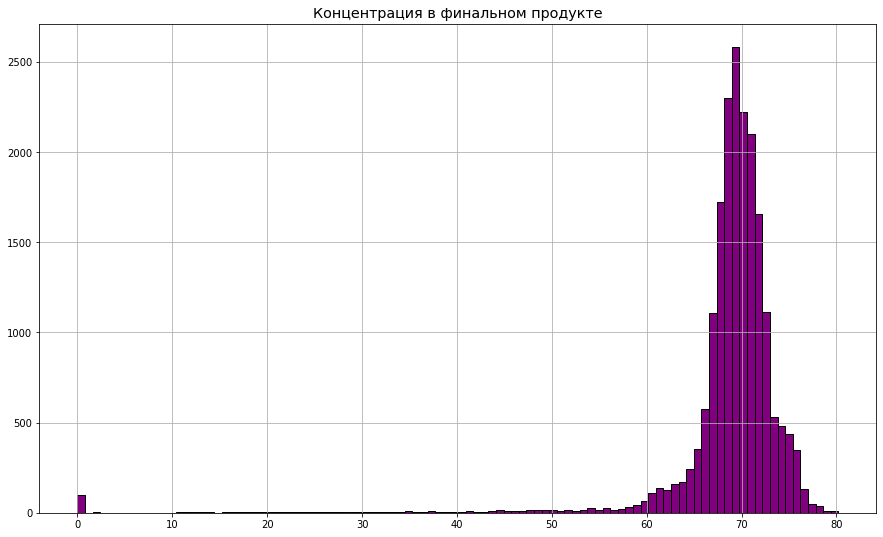

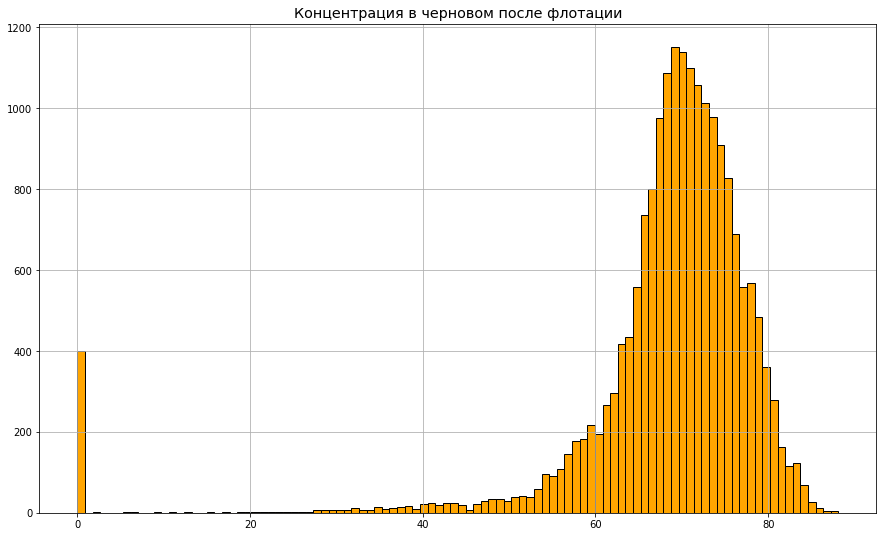

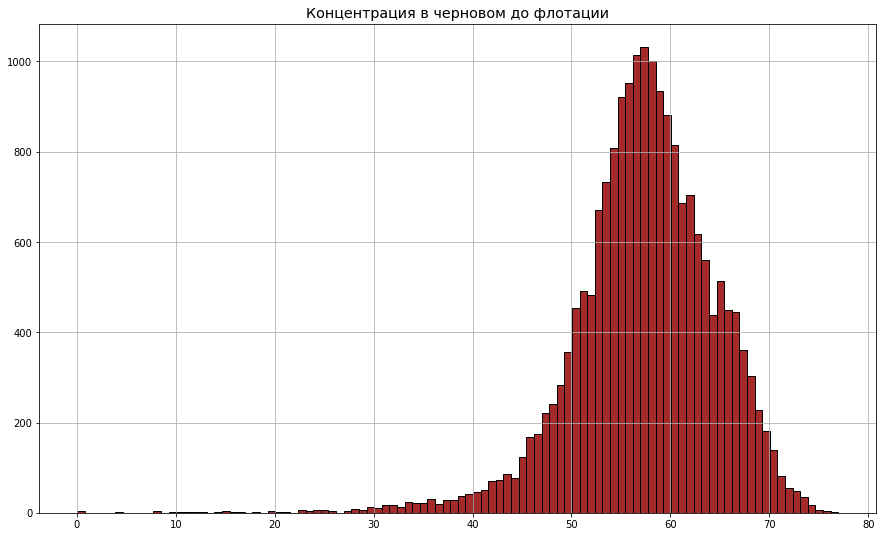

In [16]:
# построим графики по распределению концентраций
plt.figure(figsize=(15, 9))
df_con['final.output.concentrate'].hist(bins=100, edgecolor='k', color='purple')
plt.title('Концентрация в финальном продукте', fontsize='x-large')
plt.show()

plt.figure(figsize=(15, 9))
df_con['rougher.output.concentrate'].hist(bins=100, edgecolor='k', color='orange')
plt.title('Концентрация в черновом после флотации', fontsize='x-large')
plt.show()

plt.figure(figsize=(15, 9))
df_con['rougher.input.feed'].hist(bins=100, edgecolor='k', color='brown')
plt.title('Концентрация в черновом до флотации', fontsize='x-large')
plt.show()

Как видно из гистограмм, в некоторых строках есть нулевая концентрация содержания веществ.

Такое возможно только если:

- пустая порода ПИ, которая не имела в себе концентраций необходимых материалов;
- порода осталась в хвостах после обогащения;
- либо ошибка в данных

Так как нулевые значения в концентрациях могут повлиять на модель машинного обучения, стоит такие строки удалить:

In [17]:
# соберем в список необходимые строки
delete_rows = []

# заполняем
for row in df_con.index:
    if (df_con.loc[row, 'final.output.concentrate'] == 0.0 or
        df_con.loc[row, 'rougher.output.concentrate'] == 0.0 or 
        df_con.loc[row, 'rougher.input.feed'] == 0.0):
        delete_rows.append(df_con.loc[row, 'date'])
        
# удалим строки с нулевой концентрацией из полной выборки и обучающей выборки
# df_full.drop(df_full[df_full['date'].isin(delete_rows)].index, inplace=True) # Здесь таргеты для теста.
df_train.drop(df_train[df_train['date'].isin(delete_rows)].index, inplace=True)

Строки с пустым значением концетрации удалены из полной и обучающей выборки, можно приступать к обучению модели.

**Вывод**

Общие выводы:

- Концентрация золота постепенно увеличивается с каждой очисткой
- Концентрация серебра уменьшается
- Концентрация свинца увеличивается, как и концентрация золота
- Распределение гранул сырья не повлияет негативно, можно оставить значения без изменений.
- Строки с пустым значением концетрации удалены.

## Модель

**Итоговая sMAPE**

Напишем функцию для итоговой sMAPE:

In [18]:
def sMAPE(target, predict):
    target = target.to_numpy()
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 0] - predict[y, 0]) / (abs(target[y, 0] + predict[y, 0]) / 2)
    sMAPE_1 = total / len(target) * 100
    
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 1] - predict[y, 1]) / (abs(target[y, 1] + predict[y, 1]) / 2)
    sMAPE_2 = total / len(target) * 100
    
    return 0.25 * sMAPE_1 + 0.75 * sMAPE_2

**Обучение модели**

Для обучения модели разделим обучающую выборку на таргет и параметры, отбросив те столбцы, которых нет в тестовой выборке.

Воспользуемся StandartScaler и отмасштабируем значения - это позволит улучшить качество линейных моделей.

In [19]:
features = df_train.drop(columns_not_needed, axis=1)
target = df_train[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
scaler.fit(features) 
features = scaler.transform(features)

Так же сделаем scorer из нашей функции sMAPE:

In [20]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

**Проверим модель линейной регрессии:**

In [21]:
model = LinearRegression()

scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
final_score = scores.mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 10.0596020690936


**Проверим модель дерева решений:**

In [22]:
best_depth_t = 0
final_score_b = 1000

for depth in tqdm(range(2, 12)):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
    final_score = scores.mean()
    if final_score < final_score_b:
        final_score_b = final_score
        best_depth_t = depth
        
# сохраним лучшие параметры в словаре
tree_best = {'depth':best_depth_t}
print('Средняя оценка качества модели:', final_score_b)

100%|██████████| 10/10 [00:16<00:00,  1.67s/it]

Средняя оценка качества модели: 9.173898877615558


**Проверим модель случайного леса:**

In [23]:
best_depth_f = 0
best_est_f = 0
final_score_b = 1000

for est in tqdm(range(10, 51, 10)):
    for depth in range (3, 10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
        final_score = scores.mean()
        if final_score < final_score_b:
            final_score_b = final_score
            best_est_f = est
            best_depth_f = depth
            
# сохраняем параметры в словаре
forest_best = {'depth':best_depth_f, 'n_estimators':best_est_f}
print('Средняя оценка качества модели:', final_score_b)

100%|██████████| 5/5 [16:11<00:00, 194.20s/it]

Средняя оценка качества модели: 8.751635585972817


In [24]:
forest_best

{'depth': 4, 'n_estimators': 50}

**Вывод:**

Лучшее качество показала модель:

- случайный лес с количеством деревьев 50 и глубиной 4

Проверим качество на тестовой выборке:

**Проверка на тестовой выборке**

Найдем необходимые значения таргета в полном датасете для тестовой выборке и проверим результаты:

In [22]:
features_train = df_train.drop(columns_not_needed, axis=1)
features_train = scaler.transform(features_train)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

target_test = (
    df_full[df_full['date']
            .isin(df_test['date'])]
    .reset_index(drop=True)
)

features_test = target_test.drop(columns_not_needed, axis=1)
features_test = scaler.transform(features_test)
target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]

model = RandomForestRegressor(random_state=12345, 
                              n_estimators=forest_best['n_estimators'], 
                              max_depth=forest_best['depth'])
model.fit(features_train, target_train)
predicted = model.predict(features_test)

sMAPE_test = sMAPE(target_test, predicted)
print('Итоговый sMAPE на тестовой выборке:', sMAPE_test)

Итоговый sMAPE на тестовой выборке: 9.192584822250929


**Проверка адекватности модели**

In [23]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
predicted_dummy = dummy_regr.predict(features_test)

sMAPE_dummy = sMAPE(target_test, predicted_dummy)
print('Итоговый sMAPE на dummy:', sMAPE_dummy)

Итоговый sMAPE на dummy: 9.82279305388573


**Вывод**

Итоговый sMAPE на тестовой выборке - 7.17 Проверка адекватности модели - sMAPE при DummyRegressor - 7.76.

Модель на тестовой выборке превосходит константную модель по медиане. Значит такую модель можно использовать.

**ОБЩИЙ ВЫВОД**

1) Данные успешно проанализированы, выполнена их предобработка. Показатель эффективности обогащения рассчитан корректно. Отобраны признаки, избыточные и нерелевантные для модели (некоторые параметры, характеризующие текущее состояние этапов технологического процесса). В случае изменения технологического процесса поведение данных признаков может измениться, и будет необходимо обновить модель. Для актуальных признаков были заполнены пропуски на основе имеющихся данных.

2) Проанализированы концентрации металлов (Au, Ag, Pb) на различных этапах очистки, а также суммарные концентрации веществ на всех стадиях очистки. Рассмотрены распределения размеров гранул сырья на обучающей и тестовой выборках. Были удалены нулевые значения концентрации веществ.

3) Написана функция для вычисления итогового sMAPE. На основе полученных результатов были созданы и проверены на качество несколько моделей прогнозирования искомой величины. Лучшее качество показала модель случайного леса с количеством деревьев 50 и глубиной 4. Далее модель была проверена на тестовой выборке - итоговая модель показала хороший результат и адекватное поведение при работе с тестовыми данными, данную модель можно использовать для дальнейшей работы. 